In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [13]:
accuracy_list = []
# Data
X = torch.tensor([[i] for i in range(11)], dtype=torch.float32)
y = torch.tensor([[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]], dtype=torch.float32)

In [14]:
# MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 3)     # 1 input neuron
        self.fc2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x)) # hidden layer sigmoid
        x = self.sigmoid(self.fc2(x)) # output layer sigmoid
        return x

In [15]:
model = MLP()

In [16]:
# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Training
for epoch in range(3000):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    predictions = (y_pred > 0.5).float()
    accuracy = (predictions == y).float().mean()
    accuracy_list.append(accuracy.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item()}")

Epoch 0, Loss = 0.7167316675186157
Epoch 500, Loss = 0.09431302547454834
Epoch 1000, Loss = 0.03353160619735718
Epoch 1500, Loss = 0.015267579816281796
Epoch 2000, Loss = 0.007970798760652542
Epoch 2500, Loss = 0.004602828528732061


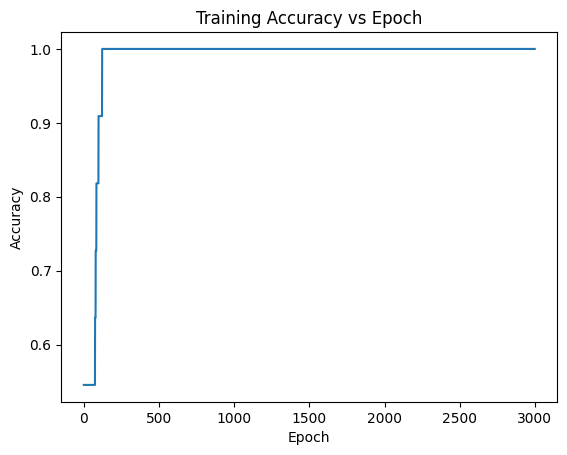

In [18]:
plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Epoch")
plt.show()

In [19]:
test = torch.tensor([[4.0], [6.0], [9.0]])
outputs = model(test)

In [20]:
print("Probabilities:\n", outputs.detach().numpy())
print("Predictions:\n", (outputs > 0.5).int())

Probabilities:
 [[1.1882781e-05]
 [9.8305607e-01]
 [9.9950325e-01]]
Predictions:
 tensor([[0],
        [1],
        [1]], dtype=torch.int32)
